In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [4]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [5]:
x.isnull().sum()

Age                0
EstimatedSalary    0
dtype: int64

In [6]:
#### Output Variable Analysis
set(y)

{0, 1}

In [7]:
np.unique(y)

array([0, 1], dtype=int64)

0    257
1    143
Name: Purchased, dtype: int64

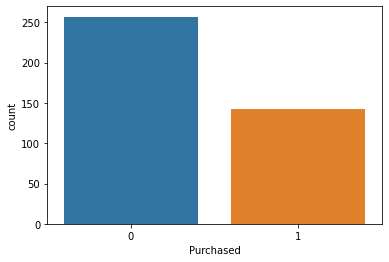

In [8]:
import seaborn as sns
sns.countplot(x = y)
df['Purchased'].value_counts()

In [9]:
from collections import Counter
Counter(y)

Counter({0: 257, 1: 143})

([<matplotlib.patches.Wedge at 0x21b94d846a0>,
 [Text(-0.47615978768185807, 0.9916006537889979, '0'),
  Text(0.47615969484150195, -0.9916006983702906, '1')],
 [Text(-0.2597235205537407, 0.5408730838849078, '64.25%'),
  Text(0.2597234699135465, -0.5408731082019766, '35.75%')])

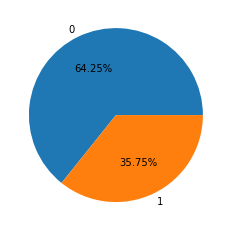

In [10]:
plt.pie(y.value_counts(),autopct = '%2.2f%%',labels = [0,1])

In [11]:
##input Variable
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


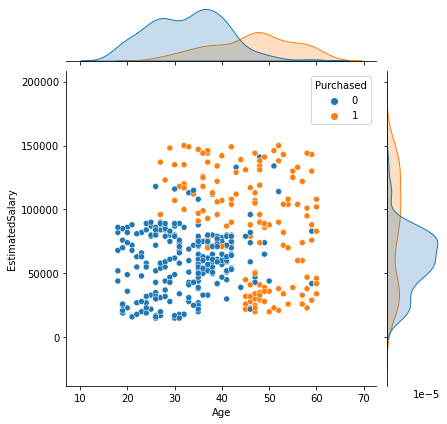

In [12]:
sns.jointplot(x='Age',y ='EstimatedSalary',data=df,hue = 'Purchased')

In [13]:
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state= 0)

In [15]:
x_train.shape

(300, 2)

In [16]:
x_test.shape


(100, 2)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
classifier = LogisticRegression()

In [19]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [20]:
###Prediction on the unseen Data
y_pred = classifier.predict(x_test)
y_test

132    0
309    0
341    0
196    0
246    0
      ..
146    1
135    0
390    1
264    1
364    1
Name: Purchased, Length: 100, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [23]:
result = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [24]:
result

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [25]:
result.value_counts()

Actual  Predicted
0       0            65
1       1            24
        0             8
0       1             3
dtype: int64

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,ConfusionMatrixDisplay

In [27]:
print(accuracy_score(y_test,y_pred))

0.89


In [28]:
cm=confusion_matrix(y_test,y_pred)

In [29]:
precision_score(y_test,y_pred)

0.8888888888888888

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [31]:
ConfusionMatrixDisplay(confusion_matrix=cm)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [33]:
#recall of class - 0 #sensitivity
r0 = 67/68 
r0

0.9852941176470589

In [34]:
#recall of class -1  # Specificity  
r1 = 22/32
r1

0.6875

In [35]:
#precision of class -0/ Postive Predictive Vlaue
p0=67/77
p0

0.8701298701298701

In [36]:
#precision of class - 1 / Negative Predictive Value

In [37]:
p1 = 22/23
p1

0.9565217391304348

In [38]:
#f1 score  for 0

f0 = 2*(p0*r0)/(p0+r0)
f0

0.9241379310344828

In [39]:
f1 = 2*(p1*r1)/(p1+r1)
f1

0.8

In [40]:
new =pd.DataFrame({
    'Age':[23,37,56],
    'EstimatedSalary':[12000,67000,134000]
})
x = new[['Age','EstimatedSalary']]
x_scaled = scaler.fit_transform(x)


In [41]:
classifier.predict(x_scaled)

array([0, 0, 1], dtype=int64)

In [42]:
classifier.predict_proba(scaler.transform(new))

array([[0.99198346, 0.00801654],
       [0.80111706, 0.19888294],
       [0.04363774, 0.95636226]])